## AMLT


## Dimensionality Reduction & Clustering

###### Flow:

- **Data Preprocessing**

- **Decision Tree Classifier without Dimensionality Reduction**

- **Dimensionality Reduction**
    - **Principal Component Analysis**
    - **Linear Discriminant Analysis**
    - **Locally Linear Embedding**
    - **t-Distributed Stochastic Neighbor Embedding**
    
- **Clustering**
    - **Hierarchical Clustering**
    - **Agglomerative Clustering**
    - **Gaussian Mixture Models Clustering**
    - **K Means Clustering**

### Dimensionality Reduction

**Dimensionality reduction is used to reduce the number of features or variables in a dataset while preserving as much of the relevant information as possible. In other words, it is a process of transforming high-dimensional data into a lower-dimensional representation, which can be more easily visualized, analyzed, and processed. In other words, it transforms high-dimensional data into a lower-dimensional, which can be better visualized, analyzed, and processed.**

### Clustering

**Clustering is used to group similar data points together based on their characteristics or features. Clustering algorithms aim to find patterns or structures in the data that may not be immediately apparent. It is used for Data Exploration, Data Preprocessing, Pattern Recognition, etc.**

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data set

data=pd.read_csv('income_data.csv')

In [3]:
data.head()

Age     Work_Class  Final_Weight   Education  Education_Years  \
0  39.0     Government         77516   Bachelors               13   
1  50.0  Self-Employed         83311   Bachelors               13   
2  38.0        Private        215646   Upto 12th                9   
3  53.0        Private        234721   Upto 12th                7   
4  28.0        Private        338409   Bachelors               13   

   Marital_Status        Occupation    Relationship    Race      Sex  ...  \
0   Never-married          Clerical   Not-in-family   White     Male  ...   
1         Married   Exec-managerial         Husband   White     Male  ...   
2        Divorced          Services   Not-in-family   White     Male  ...   
3         Married          Services         Husband   Black     Male  ...   
4         Married             Other            Wife   Black   Female  ...   

   Capital_Loss  Investment  Hours/week  Native_Country Income_Status  \
0             0        6000          40   United-States         <=50K   
1             0       16000          13   United-States          >50K   
2             0        9000          40   United-States         <=50K   
3             0        7000          40   United-States         <=50K   
4             0        3000          40            Cuba         <=50K   

  office_capsize insurance  car_benefit  dependents  \
0            mid         1            0           5   
1          large         0            0           2   
2          large         1            1           5   
3          small         1            1           4   
4            mid         0            1           3   

   prior_experience(in motnhs)  
0                            0  
1                           22  
2                           23  
3                            5  
4                           16  

[5 rows x 21 columns]

In [4]:
# Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          32555 non-null  float64
 1   Work_Class                   30725 non-null  object 
 2   Final_Weight                 32561 non-null  int64  
 3   Education                    32561 non-null  object 
 4   Education_Years              32561 non-null  int64  
 5   Marital_Status               32561 non-null  object 
 6   Occupation                   30718 non-null  object 
 7   Relationship                 32561 non-null  object 
 8   Race                         32561 non-null  object 
 9   Sex                          32561 non-null  object 
 10  Capital_Gain                 32561 non-null  int64  
 11  Capital_Loss                 32561 non-null  int64  
 12  Investment                   32561 non-null  int64  
 13  Hours/week      

In [5]:
data['Income_Status'].value_counts()

<=50K    23862
>50K      8564
>100K      135
Name: Income_Status, dtype: int64

In [6]:
data['Income_Status'].value_counts(normalize=True)

<=50K    0.732840
>50K     0.263014
>100K    0.004146
Name: Income_Status, dtype: float64

### Resampling

We observe that a large number of points belong to the '<=50K' class which implies that the data is imbalanced. To mitigate this problem, we resample the data.

In [7]:
from sklearn.utils import resample

#### Downsampling

In [8]:
data_lessThan50=data[data['Income_Status']=='<=50K']
data_lessThan50.shape

(23862, 21)

In [9]:
data_lessThan50_down=resample(data_lessThan50,replace=True,random_state=100,n_samples=20000)
data_lessThan50_down.shape

(20000, 21)

#### Upsampling

In [10]:
data_moreThan50=data[data['Income_Status']=='>50K']
data_moreThan50.shape

(8564, 21)

In [11]:
data_moreThan50_up=resample(data_moreThan50,replace=True,random_state=100,n_samples=15000)
data_moreThan50_up.shape

(15000, 21)

In [12]:
data_moreThan100=data[data['Income_Status']=='>100K']
data_moreThan100.shape

(135, 21)

In [13]:
data_moreThan100_up=resample(data_moreThan100,replace=True,random_state=100,n_samples=1000)
data_moreThan100_up.shape

(1000, 21)

In [14]:
data=pd.concat([data_moreThan50_up,data_lessThan50_down,data_moreThan100_up])

In [15]:
data.shape

(36000, 21)

#### 'Income Status' is our target variable that is to be classified.

### Cleaning the data

#### Dropping Irrelevant Columns

After studying the data thoroughly, we figured out that the 'Final_Weight' column is not useful for analysis and therefore decide to drop them.

In [16]:
# 'Final_Weight' is not useful for analysis

data.drop(['Final_Weight'],axis=1,inplace=True)
data.drop(['Native_Country'],axis=1,inplace=True)

#### Dealing with Null Values

In [17]:
data.isnull().sum()

Age                              10
Work_Class                     1762
Education                         0
Education_Years                   0
Marital_Status                    0
Occupation                     1770
Relationship                      0
Race                              0
Sex                               0
Capital_Gain                      0
Capital_Loss                      0
Investment                        0
Hours/week                        0
Income_Status                     0
office_capsize                    0
insurance                         0
car_benefit                       0
dependents                        0
prior_experience(in motnhs)       0
dtype: int64

In [18]:
# Resolving 'Age' null values

print('Minimum Age =',data['Age'].min())
print('Maximum Age =',data['Age'].max())
print('Mean Age =',data['Age'].mean())
print('Median Age =',data['Age'].median())
print('SD of Age =',data['Age'].std())

Minimum Age = 17.0
Maximum Age = 90.0
Mean Age = 39.88599611003056
Median Age = 39.0
SD of Age = 13.13153546439902


As Mean and Median are very close it can be said that there are very few to no outliers. Thus we replace all the null values of 'Age' with the Median.

In [19]:
data['Age'].fillna(value=data['Age'].median(),inplace=True)

In [20]:
# Resolving 'Work_Class' null values

data['Work_Class'].value_counts()

 Private         24075
Government        5401
Self-Employed     4734
 Never-worked       28
Name: Work_Class, dtype: int64

In [21]:
data['Work_Class'].value_counts(normalize=True)

 Private         0.703166
Government       0.157749
Self-Employed    0.138267
 Never-worked    0.000818
Name: Work_Class, dtype: float64

As more than 70% of the values in 'Work_Class' are 'Private', we replace all the null values with 'Private'.

In [22]:
data['Work_Class'].fillna(value='Private',inplace=True)

In [23]:
# Resolving 'Work_Class' null values

data['Occupation'].value_counts()

Services            8775
Clerical            7911
Other               6655
 Exec-managerial    5815
 Sales/Support      5060
 Armed-Forces         14
Name: Occupation, dtype: int64

In [24]:
data['Occupation'].value_counts(normalize=True)

Services            0.256354
Clerical            0.231113
Other               0.194420
 Exec-managerial    0.169880
 Sales/Support      0.147824
 Armed-Forces       0.000409
Name: Occupation, dtype: float64

As most of the values in **'Occupation'** are **'Services'**, we replace all the null values with **'Services'**.

In [25]:
data['Occupation'].fillna(value='Services',inplace=True)

In [26]:
data.isnull().sum()

Age                            0
Work_Class                     0
Education                      0
Education_Years                0
Marital_Status                 0
Occupation                     0
Relationship                   0
Race                           0
Sex                            0
Capital_Gain                   0
Capital_Loss                   0
Investment                     0
Hours/week                     0
Income_Status                  0
office_capsize                 0
insurance                      0
car_benefit                    0
dependents                     0
prior_experience(in motnhs)    0
dtype: int64

#### All null values have been dealt with.

### Checking for Duplicates

In [27]:
# Checking total number of duplicates

data.duplicated().sum()

15319

In [28]:
# Dropping Duplicates and keeping the first instance

data.drop_duplicates(keep='first',inplace=True)

In [29]:
data.duplicated().sum()

0

#### All duplicates have been dealt with.

### Pre- Processing the data

#### Defining the target Variable

In [30]:
data.replace(to_replace='<=50K',value=0,inplace=True)
data.replace(to_replace='>50K',value=1,inplace=True)
data.replace(to_replace='>100K',value=2,inplace=True)

In [31]:
y=data['Income_Status']
y.value_counts()

0    13506
1     7040
2      135
Name: Income_Status, dtype: int64

In [32]:
y.value_counts(normalize=True)

0    0.653063
1    0.340409
2    0.006528
Name: Income_Status, dtype: float64

In [33]:
y.shape

(20681,)

As the classes of the target variable are '<=50K' and '>50K', we replace the classes with 0 and 1 respectively.

In [34]:
# Dropping the target variable from the feature set

X=data.drop(['Income_Status'],axis=1)

In [35]:
X.drop(['Relationship'],axis=1,inplace=True)

In [36]:
# Identifying categorical features and performing 1 hot encoding

category_cols=['Work_Class','Education','Marital_Status','Occupation','Race','Sex','office_capsize']

X_1=pd.get_dummies(X,columns=category_cols)

In [37]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20681 entries, 20690 to 27245
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20681 non-null  float64
 1   Education_Years                    20681 non-null  int64  
 2   Capital_Gain                       20681 non-null  int64  
 3   Capital_Loss                       20681 non-null  int64  
 4   Investment                         20681 non-null  int64  
 5   Hours/week                         20681 non-null  int64  
 6   insurance                          20681 non-null  int64  
 7   car_benefit                        20681 non-null  int64  
 8   dependents                         20681 non-null  int64  
 9   prior_experience(in motnhs)        20681 non-null  int64  
 10  Work_Class_ Never-worked           20681 non-null  uint8  
 11  Work_Class_ Private                20681 non-null 

In [38]:
X_1.head()

Age  Education_Years  Capital_Gain  Capital_Loss  Investment  \
20690  43.0               13             0             0       14000   
25803  62.0               13             0             0        5000   
30476  37.0               10             0          1887       34000   
273    27.0               14             0             0        2000   
1191   48.0               10             0             0       15000   

       Hours/week  insurance  car_benefit  dependents  \
20690          45          1            0           3   
25803          20          0            1           2   
30476          60          0            0           2   
273            35          0            1           5   
1191           40          1            0           5   

       prior_experience(in motnhs)  ...  Race_ Amer-Indian-Eskimo  \
20690                            9  ...                         0   
25803                           21  ...                         0   
30476                            4  ...                         0   
273                             19  ...                         0   
1191                            16  ...                         0   

       Race_ Asian-Pac-Islander  Race_ Black  Race_ Other  Race_ White  \
20690                         0            0            0            1   
25803                         0            0            0            1   
30476                         0            1            0            0   
273                           0            0            0            1   
1191                          0            0            0            1   

       Sex_ Female  Sex_ Male  office_capsize_large  office_capsize_mid  \
20690            0          1                     0                   1   
25803            0          1                     0                   1   
30476            0          1                     1                   0   
273              0          1                     0                   0   
1191             0          1                     0                   0   

       office_capsize_small  
20690                     0  
25803                     0  
30476                     0  
273                       1  
1191                      1  

[5 rows x 38 columns]

In [39]:
X_1.shape

(20681, 38)

In [40]:
y.shape

(20681,)

In [41]:
X_1.shape

(20681, 38)

In [42]:
X_1

Age  Education_Years  Capital_Gain  Capital_Loss  Investment  \
20690  43.0               13             0             0       14000   
25803  62.0               13             0             0        5000   
30476  37.0               10             0          1887       34000   
273    27.0               14             0             0        2000   
1191   48.0               10             0             0       15000   
...     ...              ...           ...           ...         ...   
16170  39.0               13             0             0       31000   
13186  32.0               13             0          1902       34000   
22398  39.0               14          5178             0       33000   
28980  45.0               16             0             0       34000   
27245  43.0               14             0          2547       31000   

       Hours/week  insurance  car_benefit  dependents  \
20690          45          1            0           3   
25803          20          0            1           2   
30476          60          0            0           2   
273            35          0            1           5   
1191           40          1            0           5   
...           ...        ...          ...         ...   
16170          50          0            0           2   
13186          32          1            0           4   
22398          38          0            1           5   
28980          60          1            1           5   
27245          40          1            0           2   

       prior_experience(in motnhs)  ...  Race_ Amer-Indian-Eskimo  \
20690                            9  ...                         0   
25803                           21  ...                         0   
30476                            4  ...                         0   
273                             19  ...                         0   
1191                            16  ...                         0   
...                            ...  ...                       ...   
16170                            8  ...                         0   
13186                            1  ...                         0   
22398                           16  ...                         0   
28980                           23  ...                         0   
27245                           22  ...                         0   

       Race_ Asian-Pac-Islander  Race_ Black  Race_ Other  Race_ White  \
20690                         0            0            0            1   
25803                         0            0            0            1   
30476                         0            1            0            0   
273                           0            0            0            1   
1191                          0            0            0            1   
...                         ...          ...          ...          ...   
16170                         0            0            0            1   
13186                         0            0            0            1   
22398                         0            0            0            1   
28980                         0            0            0            1   
27245                         0            0            0            1   

       Sex_ Female  Sex_ Male  office_capsize_large  office_capsize_mid  \
20690            0          1                     0                   1   
25803            0          1                     0                   1   
30476            0          1                     1                   0   
273              0          1                     0                   0   
1191             0          1                     0                   0   
...            ...        ...                   ...                 ...   
16170            1          0                     1                   0   
13186            1          0                     1                   0   
22398            1          0                     1              

# Standardizing the Data

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_1)
X_scaled

array([[ 0.29016408,  1.05555976, -0.16099684, ..., -0.70844066,
         1.4124716 , -0.70490259],
       [ 1.70740192,  1.05555976, -0.16099684, ..., -0.70844066,
         1.4124716 , -0.70490259],
       [-0.15738471, -0.09881686, -0.16099684, ...,  1.41155084,
        -0.70797883, -0.70490259],
       ...,
       [-0.00820178,  1.44035196,  0.45335042, ...,  1.41155084,
        -0.70797883, -0.70490259],
       [ 0.43934701,  2.20993637, -0.16099684, ..., -0.70844066,
         1.4124716 , -0.70490259],
       [ 0.29016408,  1.44035196, -0.16099684, ...,  1.41155084,
        -0.70797883, -0.70490259]])

# Decision Tree Classifier without Dimension Reduction

In [ ]:
from sklearn.model_selection import train_test_split

In [114]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
     X_scaled,y,test_size=0.2,random_state=100)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((16544, 38), (4137, 38), (16544,), (4137,))

In [124]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [115]:
dt1=DecisionTreeClassifier()
dt1=dt1.fit(X_train_1,y_train_1)

In [116]:
y_pred_dt=dt1.predict(X_test_1)
y_pred_dt

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [118]:
pred_df_dt=pd.DataFrame({'Actual Class':y_test_1,
                      'Predicted Class':y_pred_dt})

pred_df_dt.head(10)

Actual Class  Predicted Class
12530             1                1
26804             0                1
5066              0                0
16460             1                1
887               0                0
23087             1                1
3233              0                0
3857              0                0
628               1                1
32313             0                0

In [120]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [121]:
# Classification Report of the Decision Tree without Hyper Paramter Tuning

report_dt=classification_report(y_test_1,y_pred_dt)
print('The classification report for')
print('\n** Decision Tree - No Hyper Parameter tuning **\n\n',report_dt)

The classification report for

** Decision Tree - No Hyper Parameter tuning **

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2633
           1       0.95      0.95      0.95      1475
           2       0.97      0.97      0.97        29

    accuracy                           0.96      4137
   macro avg       0.96      0.96      0.96      4137
weighted avg       0.96      0.96      0.96      4137



In [166]:
print('Accuracy without any Dimensionality Reduction = 0.96')

Accuracy without any Dimensionality Reduction = 0.96


# Principal Component Analysis (PCA)

**PCA is a method of transforming a high-dimensional dataset into a lower-dimensional space, while retaining the essential patterns or relationships between the data points. PCA identifies the principal components of the data, which are linear combinations of the original variables that capture the most variation in the dataset.**

In [130]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

In [131]:
pca.components_.T[:,0]

array([ 0.19459029,  0.30649665,  0.11412926,  0.08675432,  0.31507159,
        0.21913526,  0.00618238, -0.00478316,  0.00504466, -0.00150697,
       -0.00843879, -0.13742329,  0.07773382, -0.10163457,  0.18374744,
        0.18163188,  0.11095193, -0.26380482, -0.08403671, -0.25769904,
       -0.10151084,  0.33988727,  0.0018233 ,  0.1713741 ,  0.03243449,
       -0.06143734,  0.17451079, -0.23746631, -0.03326548,  0.00099126,
       -0.15080249, -0.03611302,  0.142154  , -0.2742191 ,  0.2742191 ,
        0.01078481, -0.00748388, -0.00330808])

In [132]:
pca.components_.T[:,1]

array([-0.10158319,  0.38244161,  0.02808418,  0.01008018, -0.00939919,
       -0.06250147,  0.00826236,  0.007585  ,  0.0015125 , -0.00324622,
       -0.00724782, -0.08194771,  0.16957248, -0.02920056, -0.04358646,
        0.22666344,  0.23542495, -0.42046201,  0.12865007,  0.18241844,
        0.04752936, -0.27589279,  0.00243682,  0.06924628,  0.03885   ,
       -0.05477452,  0.20877574, -0.19983276,  0.00392944,  0.06430556,
        0.06075066, -0.0030162 , -0.08352958,  0.37448946, -0.37448946,
       -0.01063901,  0.00264745,  0.00800551])

In [133]:
pca.components_.shape

(28, 38)

In [136]:
exp_var=pca.explained_variance_ratio_
exp_var

array([0.09652624, 0.06887397, 0.05295028, 0.04814419, 0.04528378,
       0.03975176, 0.039472  , 0.03864892, 0.0357387 , 0.03343505,
       0.03086793, 0.02989983, 0.02855201, 0.02824933, 0.02721012,
       0.0271128 , 0.02684248, 0.02666397, 0.02652328, 0.02604323,
       0.02597512, 0.02567108, 0.02556541, 0.02473431, 0.02444892,
       0.02280001, 0.02062572, 0.01682713])

In [137]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.09652624, 0.16540021, 0.21835049, 0.26649467, 0.31177845,
       0.35153022, 0.39100221, 0.42965113, 0.46538983, 0.49882488,
       0.52969281, 0.55959265, 0.58814465, 0.61639398, 0.64360411,
       0.67071691, 0.69755939, 0.72422336, 0.75074664, 0.77678987,
       0.80276499, 0.82843607, 0.85400148, 0.87873579, 0.90318471,
       0.92598472, 0.94661044, 0.96343758])

In [138]:
X_pca.shape

(20681, 28)

#### The required number of PCA dimensions to capture 95% Variance is 28.

### Reducing Dimensions to 2.

In [140]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [172]:
X_pca.shape

(20681, 2)

In [141]:
pca.components_.shape

(2, 38)

In [142]:
exp_var=pca.explained_variance_ratio_
exp_var

array([0.09652624, 0.06887373])

In [143]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.09652624, 0.16539997])

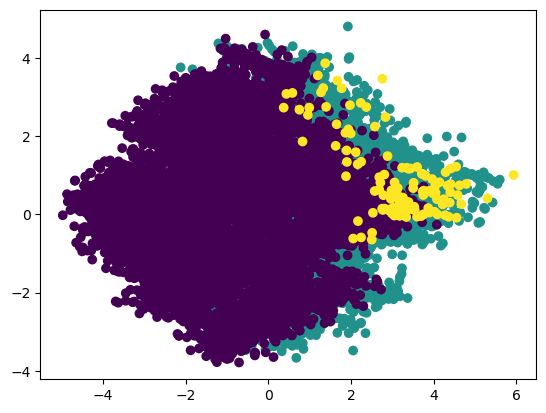

In [139]:
plt.scatter(X_pca[:,0], X_pca[:,1],marker='o',c=y)

**It is can be observed that all clusters are overlapping each other and no disctinct clusters are formed.**

**PCA Dimensionality Reduction is not suitable for this dataset.**

## Decision Tree Classifier after PCA Dimension Reduction

In [125]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
     X_pca,y,test_size=0.2,random_state=100)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((16544, 2), (4137, 2), (16544,), (4137,))

In [126]:
dt1=DecisionTreeClassifier()
dt1=dt1.fit(X_train_1,y_train_1)

In [127]:
y_pred_dt=dt1.predict(X_test_1)
y_pred_dt

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [144]:
# Classification Report of the Decision Tree without Hyper Paramter Tuning

report_dt=classification_report(y_test_1,y_pred_dt)
print('The classification report for')
print('\n** Decision Tree **\n\n',report_dt)

The classification report for

** Decision Tree **

               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2633
           1       0.72      0.70      0.71      1475
           2       0.06      0.07      0.06        29

    accuracy                           0.79      4137
   macro avg       0.54      0.54      0.54      4137
weighted avg       0.79      0.79      0.79      4137



In [168]:
print('Accuracy with PCA Dimensionality Reduction = 0.79')

Accuracy with PCA Dimensionality Reduction = 0.79


#### Here, we see that our accuracy is going down from 0.96 to 0.79 after applying PCA as reducing to 2 dimensions only captures 16% of total variance.

# Linear Discriminant Analysis (LDA)

**The goal of LDA is to project the data onto a lower-dimensional space while maximizing the separation between the classes. In other words, LDA tries to find the axis along which the different classes are most separated, while minimizing the variance within each class.**

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
lda=LinearDiscriminantAnalysis(n_components=2)

In [56]:
y.unique()

array([1, 0, 2], dtype=int64)

In [57]:
X_lda=lda.fit_transform(X_scaled,y)

In [58]:
X_lda

array([[-1.81614029,  0.11600225],
       [-0.19111674,  1.94718034],
       [-5.20273662, -1.04288468],
       ...,
       [-5.31160965, -1.68246272],
       [-5.72055401, -0.11761824],
       [-4.72588366, -1.99551649]])

In [59]:
X_lda.shape

(20681, 2)

#### Visualisation of the data

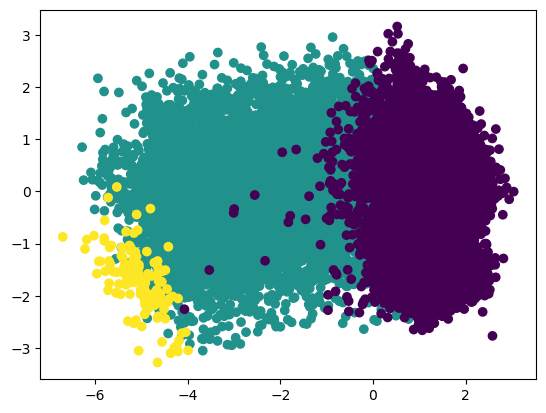

In [60]:
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);

#### Here, it can be observed that 3 clusters are formed with little overlap. Hence, it can be concluded that LDA is fit for this dataset.

## Decision Tree Classifier after LDA Dimension Reduction

In [146]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
     X_lda,y,test_size=0.2,random_state=100)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((16544, 2), (4137, 2), (16544,), (4137,))

In [147]:
dt1=DecisionTreeClassifier()
dt1=dt1.fit(X_train_1,y_train_1)

In [148]:
y_pred_dt=dt1.predict(X_test_1)
y_pred_dt

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [149]:
# Classification Report of the Decision Tree without Hyper Paramter Tuning

report_dt=classification_report(y_test_1,y_pred_dt)
print('The classification report for')
print('\n** Decision Tree **\n\n',report_dt)

The classification report for

** Decision Tree **

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2633
           1       0.93      0.92      0.92      1475
           2       0.76      0.86      0.81        29

    accuracy                           0.95      4137
   macro avg       0.88      0.91      0.90      4137
weighted avg       0.95      0.95      0.95      4137



In [169]:
print('Accuracy with LDA Dimensionality Reduction = 0.95')

Accuracy with LDA Dimensionality Reduction = 0.95


#### The accuracy is almost the same after applying LDA. This is because good clusters with very little overlap are being formed.

# Locally Linear Embedding (LLE)

**LLE is a method that seeks to find a low-dimensional representation of a high-dimensional dataset while preserving the local relationships between the data points. It assumes that the data lies on a low-dimensional manifold (a curved surface embedded in a high-dimensional space) and tries to map this manifold to a lower-dimensional space.**

In [61]:
from sklearn.manifold import LocallyLinearEmbedding

In [62]:
lle=LocallyLinearEmbedding(n_neighbors=10,n_components=2)

In [63]:
X_lle=lle.fit_transform(X_scaled)
X_lle

array([[ 0.00093046,  0.00156704],
       [ 0.00152932, -0.00067649],
       [-0.00176742, -0.00193288],
       ...,
       [-0.0007046 , -0.0047607 ],
       [-0.00125416, -0.00499874],
       [ 0.00018235,  0.00598456]])

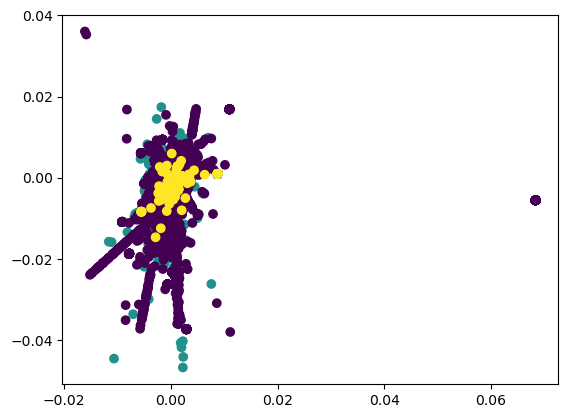

In [64]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

**It can be observed that no disctinct clusters are formed. There is very high overlap between the clusters. Hence, LLE is not suitable for this dataset.**

## Decision Tree Classifier after LLE Dimension Reduction

In [150]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
     X_lle,y,test_size=0.2,random_state=100)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((16544, 2), (4137, 2), (16544,), (4137,))

In [151]:
dt1=DecisionTreeClassifier()
dt1=dt1.fit(X_train_1,y_train_1)

In [152]:
y_pred_dt=dt1.predict(X_test_1)
y_pred_dt

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [153]:
# Classification Report of the Decision Tree without Hyper Paramter Tuning

report_dt=classification_report(y_test_1,y_pred_dt)
print('The classification report for')
print('\n** Decision Tree **\n\n',report_dt)

The classification report for

** Decision Tree **

               precision    recall  f1-score   support

           0       0.72      0.76      0.74      2633
           1       0.53      0.48      0.50      1475
           2       0.00      0.00      0.00        29

    accuracy                           0.65      4137
   macro avg       0.42      0.41      0.41      4137
weighted avg       0.65      0.65      0.65      4137



In [170]:
print('Accuracy with LLE Dimensionality Reduction = 0.65')

Accuracy with LLE Dimensionality Reduction = 0.65


#### Here, we see that our accuracy has reduced highly from 0.96 to 0.65 after applying LLE as reducing to 2 dimensions captures low variance and no distinct clusters are formed.

# t-Distributed Stochastic Neighbor Embedding (TSNE)

**t-SNE seeks to find a low-dimensional representation of a high-dimensional dataset while preserving the local relationships between the data points using Probabilistic Distribution. It is particularly good at preserving the structure of clusters in the data and can be used for visualization and exploratory data analysis.**

In [65]:
# Creating a smaller sample of data as TSNE is not fit for large data

data_sample=data.sample(n=10000)
X_sample=data_sample.drop(['Income_Status','Relationship'],axis=1)
X_sample=pd.get_dummies(X_sample,columns=category_cols)
y_sample=data_sample['Income_Status']

In [66]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

X_tsne=tsne.fit_transform(X_sample)
X_tsne.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10000, 2)

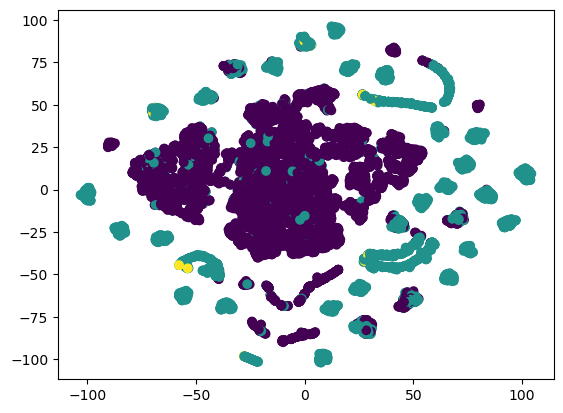

In [67]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_sample.astype(float));

**A pattern can be seen emerging as we increase the no. of data points and perplexity. Data points of once class are forming the border of the square and other class are occupying the centre of the square. Thus tSNE is giving a good result for the dataset.**

In [68]:
X_df=pd.DataFrame({'X0':X_tsne[:,0],
                  'X1':X_tsne[:,1],
                  'Label':y_sample})
X_df

X0         X1  Label
14624  59.736835 -32.413300      1
10233  24.145296  13.224355      0
32037   2.394823 -57.000702      0
3950    5.349670  -8.489941      0
19282  32.356735 -44.196850      1
...          ...        ...    ...
29695 -22.366533  19.960146      0
6299   53.788269  -6.908775      1
29816 -20.666393 -38.601303      0
16246  16.060808  94.331017      1
1617   79.179535  49.536850      0

[10000 rows x 3 columns]

<Figure size 1500x1200 with 0 Axes>

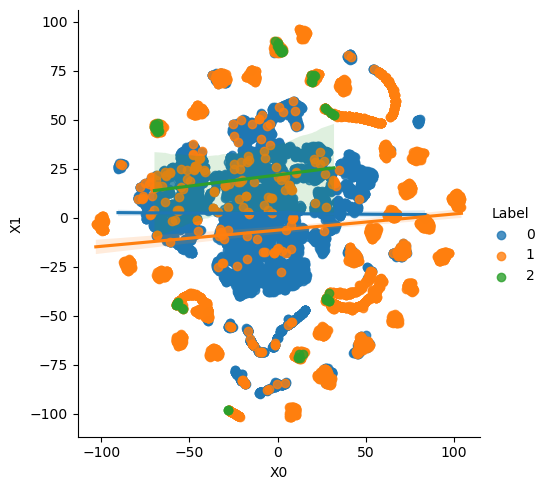

In [69]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',hue='Label');

## Decision Tree Classifier after TSNE Dimension Reduction

In [155]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(
     X_tsne,y_sample,test_size=0.2,random_state=100)

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [156]:
dt1=DecisionTreeClassifier()
dt1=dt1.fit(X_train_1,y_train_1)

In [157]:
y_pred_dt=dt1.predict(X_test_1)
y_pred_dt

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [158]:
# Classification Report of the Decision Tree without Hyper Paramter Tuning

report_dt=classification_report(y_test_1,y_pred_dt)
print('The classification report for')
print('\n** Decision Tree **\n\n',report_dt)

The classification report for

** Decision Tree **

               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1275
           1       0.91      0.91      0.91       717
           2       0.18      0.25      0.21         8

    accuracy                           0.94      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.94      0.94      0.94      2000



In [171]:
print('Accuracy with PCA Dimensionality Reduction = 0.94')

Accuracy with PCA Dimensionality Reduction = 0.94


#### Here, we see that our accuracy is 0.94 which is almost the same.

# Dimensionality Reduction Insights

### Accuracy is high when LDA and t-SNE is used as compared to PCA and LLE. This might be because PCA and LLE fail when data has noise, outliers, complex relationships that are non-linear, etc. 
### LDA and tSNE are robust when it comes to outliers, complex non-linear relationships, etc. making them a good fit for this dataset.

# Hierarchical Clustering

**Hierarchical clustering is a clustering algorithm that groups similar data points into clusters based on their pairwise similarity or dissimilarity.It is often used in exploratory data analysis and data visualization, as it can reveal the underlying structure of the data and identify patterns or clusters in the data.**

### Drawing the Dendrogram

In [70]:
import scipy.cluster.hierarchy as sch

In [71]:
data_sample2=data.sample(n=5000)
X_sample2=data_sample2.drop(['Income_Status','Relationship'],axis=1)
X_sample2=pd.get_dummies(X_sample2,columns=category_cols)
y_sample2=data_sample2['Income_Status']

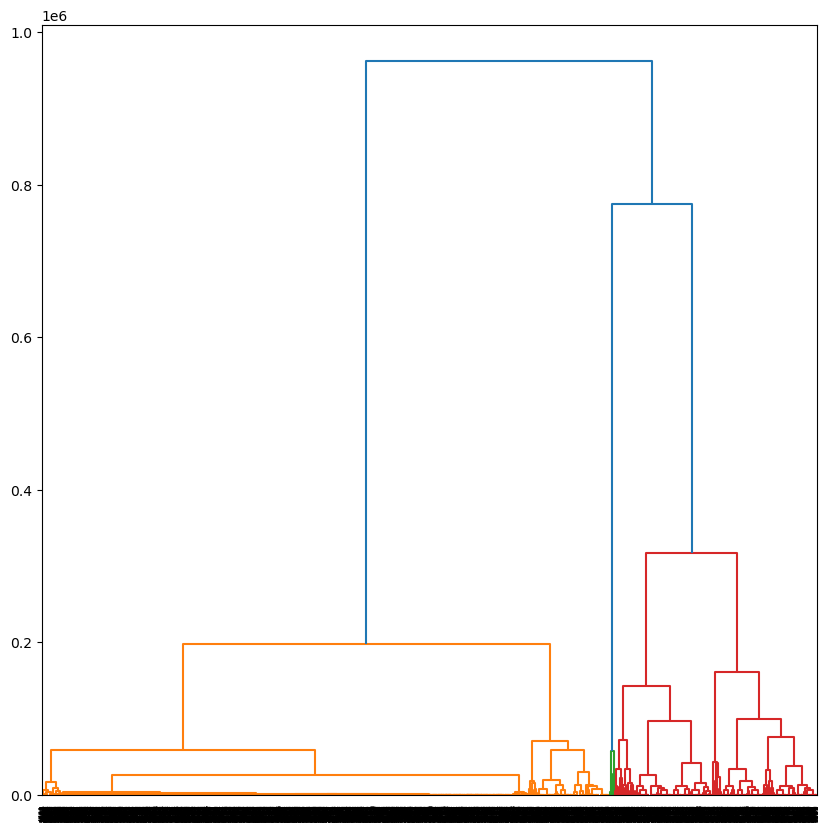

In [162]:
plt.figure(figsize=(10,10))
dendro=sch.dendrogram(sch.linkage(X_sample2,method='ward'))

**Hierarchical Clustering is not preferred for this dataset as clusters are not uniform, i.e. the distance between the clusters is very high.**

## Agglomerative Clustering 

**Agglomerative clustering is a sub-type of Hierarchical Clustering. It starts with each data point as its own cluster and then successively merges the closest pairs of clusters until all the data points belong to a single cluster. It is a bottom to top approach.**

In [73]:
from sklearn.cluster import AgglomerativeClustering

AggClust=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [74]:
AggClust.fit_predict(X_scaled)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [75]:
AggClust.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
AggClust.labels_.shape

(20681,)

In [163]:
X_3=X.drop(['Work_Class','Education','Marital_Status','Occupation','Race','Sex','office_capsize',
            'insurance','car_benefit'],axis=1)

In [164]:
X_3['Label']=AggClust.labels_

<Figure size 1500x1200 with 0 Axes>

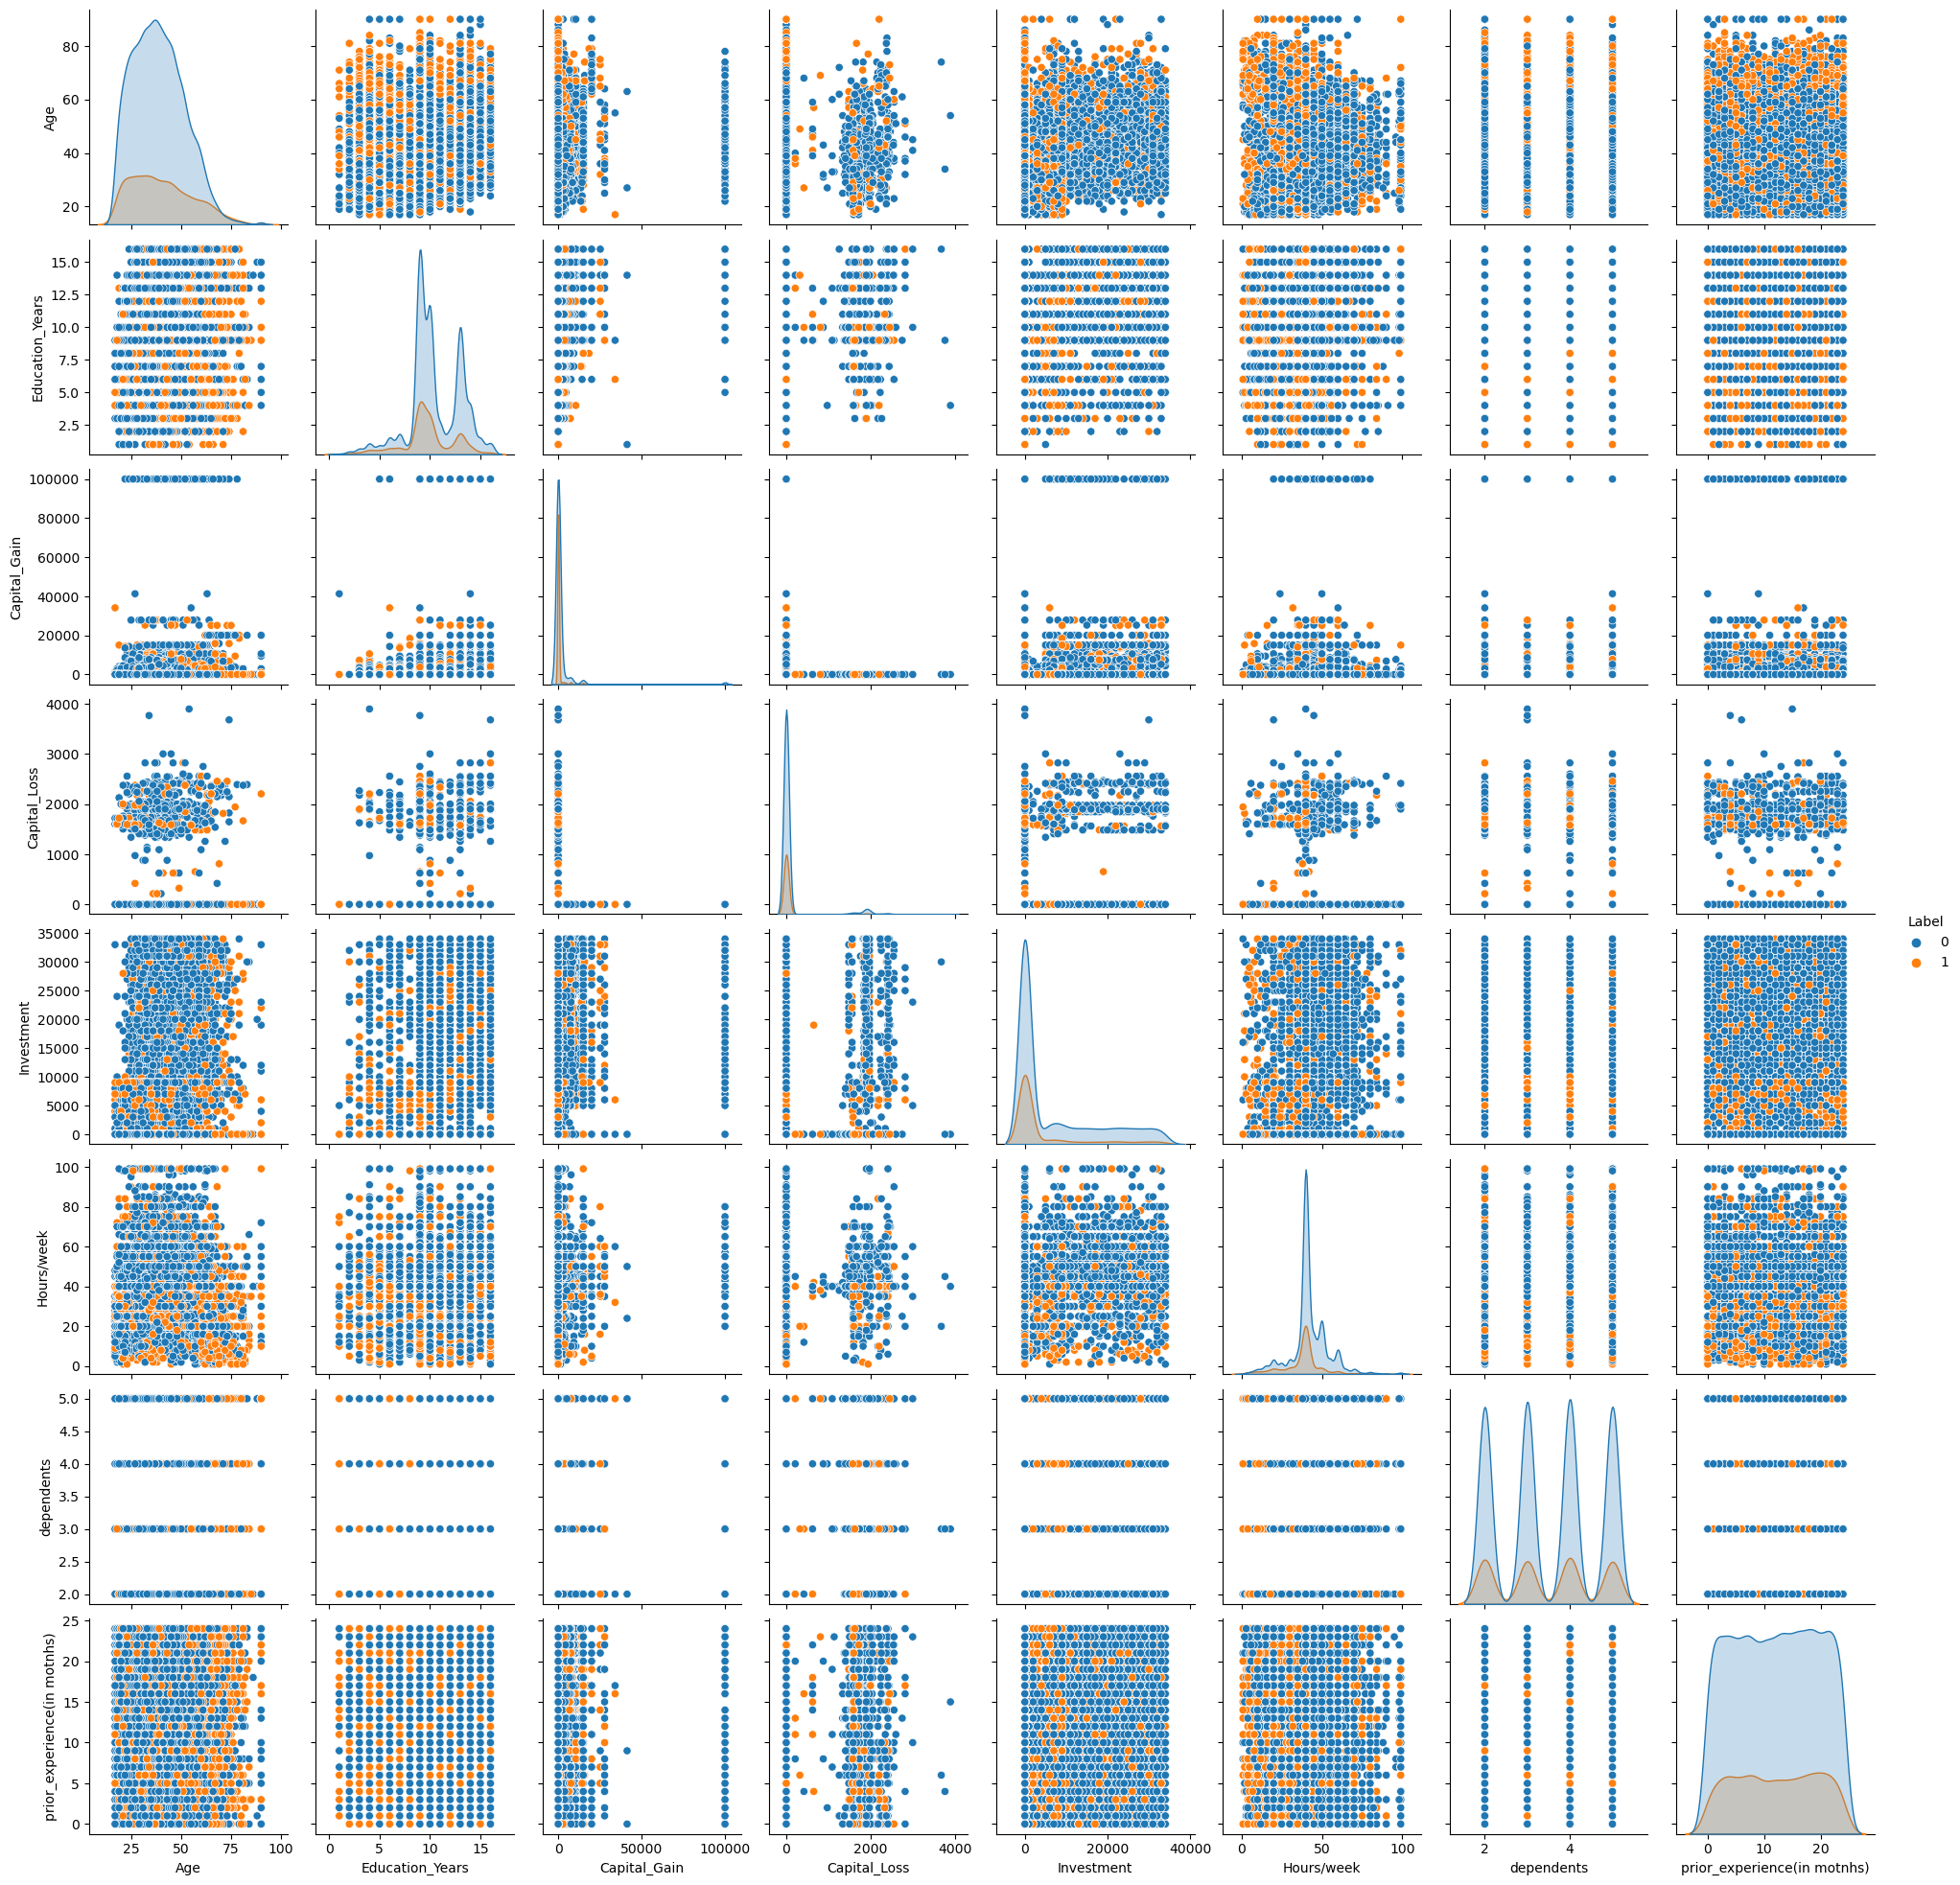

In [165]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X_3,hue='Label');

**In the Pair Plot it can be observed that no plot has distinct clusters. This indicates that Hierarchical Clustering is not fit for our data.**

# Gaussian Mixture Models Clustering

**GMM clustering is a probabilistic clustering algorithm used for identifying groups of data points that share similar statistical properties. GMM clustering provides a probabilistic output, which means that each data point is assigned a probability of belonging to each cluster rather than a hard assignment to a single cluster.**

In [88]:
from sklearn.mixture import GaussianMixture

In [89]:
n_comps=np.arange(1,15,1)
aic_score=[]
bic_score=[]
for n in n_comps:
    model=GaussianMixture(n_components=n,
                          random_state=10,
                        n_init=3)
    model.fit(X_3)
    aic_score.append(model.aic(X_3))
    bic_score.append(model.bic(X_3))

In [90]:
print(aic_score)

[1806944.260558825, 778898.4265330677, 762868.2181836241, 464098.279411889, 463495.69196800777, 451179.8256683766, 284137.83243728697, 284136.71514214727, 266004.82949036337, 228238.20012736728, 258319.4482549239, 266398.18600183714, 264760.3843169638, 257936.8059593892]


In [91]:
print(bic_score)

[1807293.4872688926, 779604.8169238861, 763931.7722551933, 465518.9971642091, 465273.57340107876, 453314.87078219844, 286630.0412318597, 286986.0876174709, 269211.36564643786, 231801.89996419262, 262240.3117725001, 270676.2132001642, 269395.5751960417, 262929.160519218]


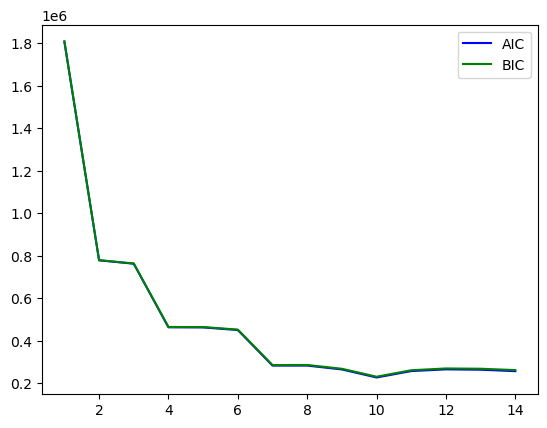

In [92]:
# Plotting
plt.plot(n_comps,aic_score,c='b',label='AIC')
plt.plot(n_comps,bic_score,c='g',label='BIC')
plt.legend();

In [93]:
gm=GaussianMixture(n_components=2,random_state=100,n_init=3)

In [94]:
gm.fit(X_3)

GaussianMixture(n_components=2, n_init=3, random_state=100)

In [95]:
pred=gm.predict(X_3)
pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
gm.means_

array([[4.34019640e+01, 1.12379705e+01, 9.18598625e+03, 6.65258265e+02,
        1.26798691e+04, 4.39414075e+01, 3.51227496e+00, 1.20700491e+01],
       [3.83660502e+01, 1.00867469e+01, 0.00000000e+00, 0.00000000e+00,
        5.49852491e+03, 4.04245433e+01, 3.49750369e+00, 1.20690457e+01]])

In [97]:
gm.covariances_

array([[[ 1.58951356e+02,  2.21400071e+00,  2.61909302e+04,
         -7.47831146e+02,  1.97944749e+04, -6.61965579e+00,
          2.43511080e-01,  4.23888611e-01],
        [ 2.21400071e+00,  6.79869017e+00,  1.08777270e+04,
         -3.83952823e+00,  8.31775293e+03,  5.82703657e+00,
          3.58677921e-02, -2.80499409e-01],
        [ 2.61909302e+04,  1.08777270e+04,  4.08984606e+08,
         -6.11105328e+06,  3.82978300e+07,  3.30036653e+04,
          1.06908658e+03, -5.28176270e+03],
        [-7.47831146e+02, -3.83952823e+00, -6.11105328e+06,
          8.47592408e+05, -5.24116012e+05,  1.35018078e+02,
         -1.42111898e+01,  3.03573588e+01],
        [ 1.97944749e+04,  8.31775293e+03,  3.82978300e+07,
         -5.24116012e+05,  1.29111919e+08,  2.46381985e+04,
         -8.51047758e+01,  2.70687660e+03],
        [-6.61965579e+00,  5.82703657e+00,  3.30036653e+04,
          1.35018078e+02,  2.46381985e+04,  1.42055815e+02,
         -3.11064741e-01,  1.20017636e+00],
        [ 2.4351

In [98]:
gm.weights_

array([0.14772013, 0.85227987])

In [99]:
X_3['Label']=pred

In [100]:
X_3

Age  Education_Years  Capital_Gain  Capital_Loss  Investment  \
20690  43.0               13             0             0       14000   
25803  62.0               13             0             0        5000   
30476  37.0               10             0          1887       34000   
273    27.0               14             0             0        2000   
1191   48.0               10             0             0       15000   
...     ...              ...           ...           ...         ...   
16170  39.0               13             0             0       31000   
13186  32.0               13             0          1902       34000   
22398  39.0               14          5178             0       33000   
28980  45.0               16             0             0       34000   
27245  43.0               14             0          2547       31000   

       Hours/week  dependents  prior_experience(in motnhs)  Label  
20690          45           3                            9      1  
25803          20           2                           21      1  
30476          60           2                            4      0  
273            35           5                           19      1  
1191           40           5                           16      1  
...           ...         ...                          ...    ...  
16170          50           2                            8      1  
13186          32           4                            1      0  
22398          38           5                           16      0  
28980          60           5                           23      1  
27245          40           2                           22      0  

[20681 rows x 9 columns]

In [101]:
X_3['Label'].value_counts()

1    17626
0     3055
Name: Label, dtype: int64

In [102]:
X_3['Label'].value_counts()/sum(X_3['Label'].value_counts())

1    0.85228
0    0.14772
Name: Label, dtype: float64

<Figure size 1500x1200 with 0 Axes>

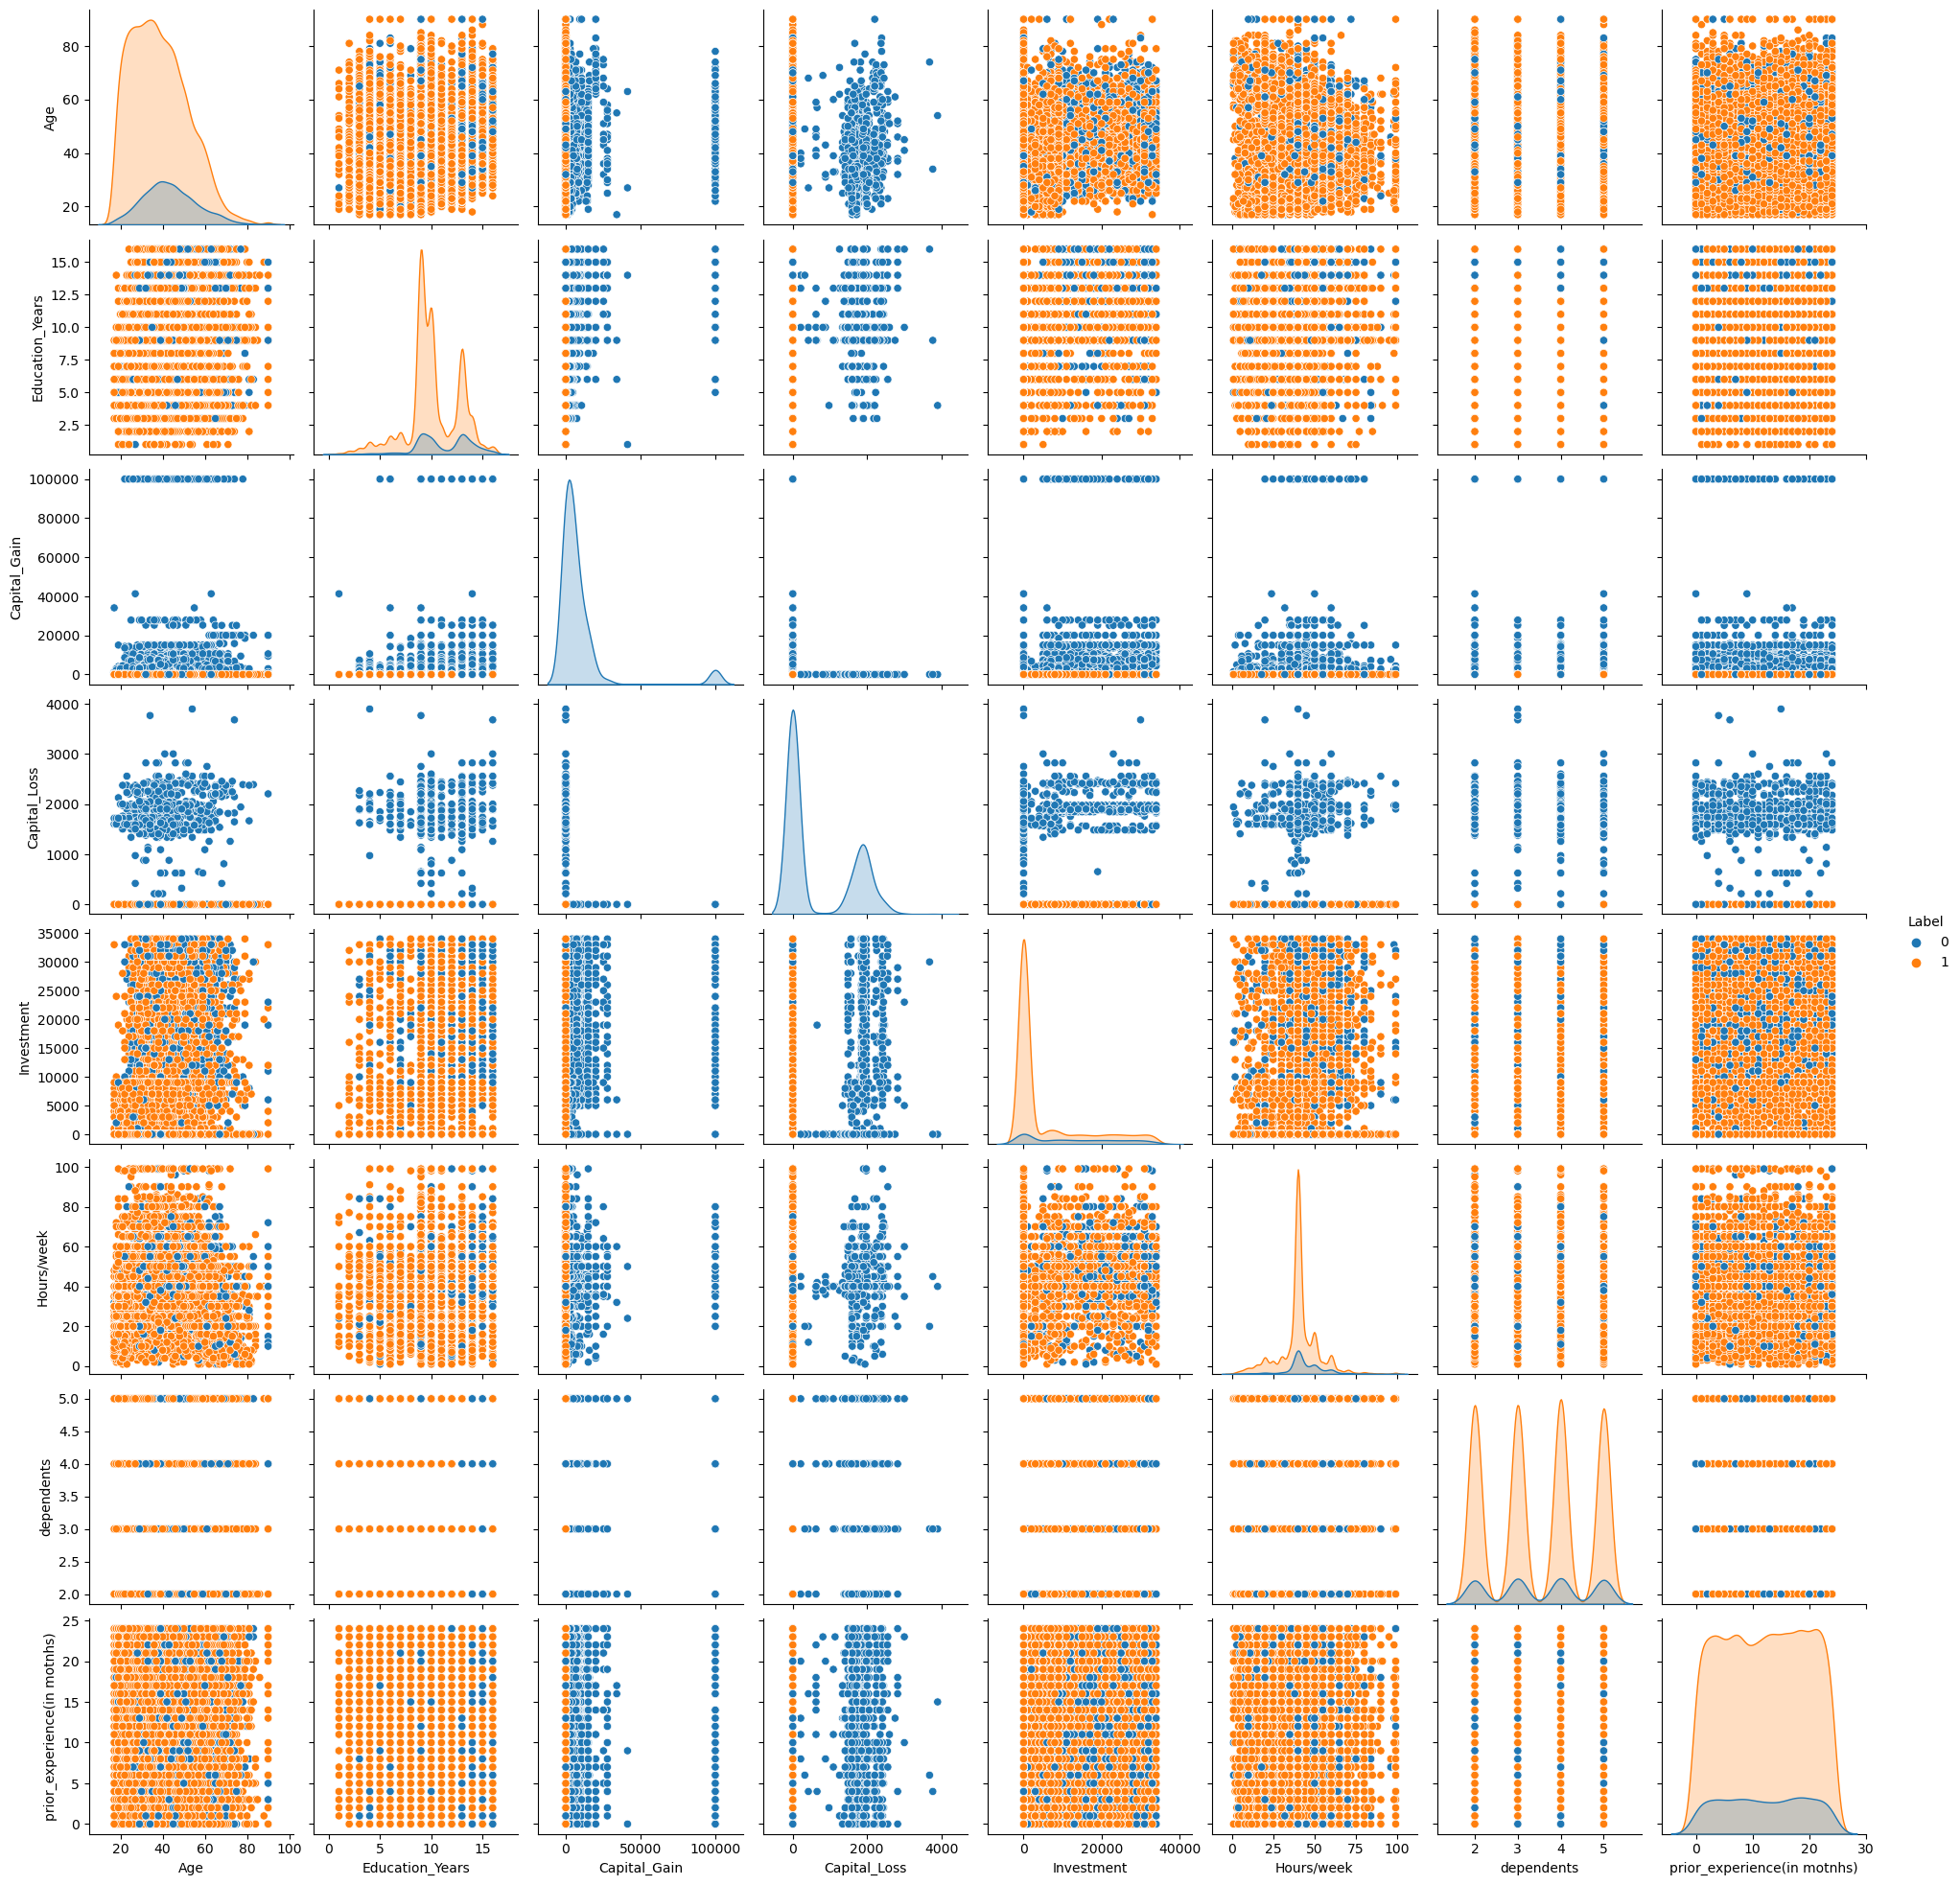

In [103]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X_3,hue='Label');

**No trends are visible in the GMM Pair Plot. It is not suitable for the dataset.**

# K Means Clustering

**K-means clustering is used for clustering similar data points together to the cluster whose centroid is closest to it based on some distance metric.**

In [104]:
from sklearn.cluster import KMeans

In [105]:
X_3.drop(['Label'],axis=1,inplace=True)

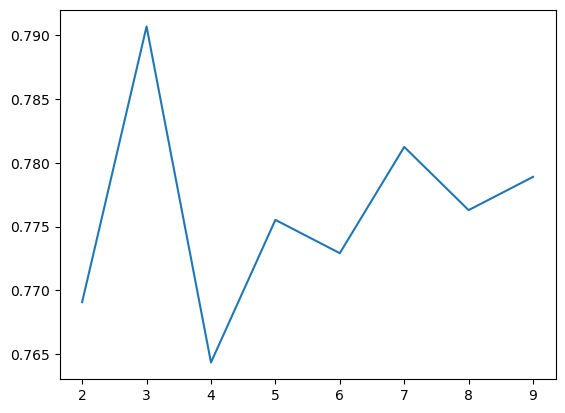

In [107]:
### Silhouette method
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_3)
    SS.append(silhouette_score(X_3,kmeans.predict(X_3)))
plt.plot(range(2,10),SS);

**As the highest peak is at x=3, the no. of optimum clusters is 3.**

In [108]:
k_best=KMeans(n_clusters=3,random_state=10)
k_best.fit(X_3)
clust_pred=k_best.predict(X_3)
clust_pred

array([2, 0, 2, ..., 2, 2, 2])

In [109]:
k_best.cluster_centers_

array([[3.74871648e+01, 9.83512133e+00, 3.30342337e+02, 7.53203065e+01,
        1.20485313e+03, 3.95248404e+01, 3.49725415e+00, 1.20228608e+01],
       [4.68872180e+01, 1.31052632e+01, 9.99990000e+04, 1.42108547e-14,
        1.73759398e+04, 5.02030075e+01, 3.74436090e+00, 1.05112782e+01],
       [4.40973813e+01, 1.15302782e+01, 1.96198036e+03, 1.74477905e+02,
        2.34195990e+04, 4.52389525e+01, 3.50081833e+00, 1.22600245e+01]])

In [110]:
X_3['Label']=clust_pred

<Figure size 1500x1200 with 0 Axes>

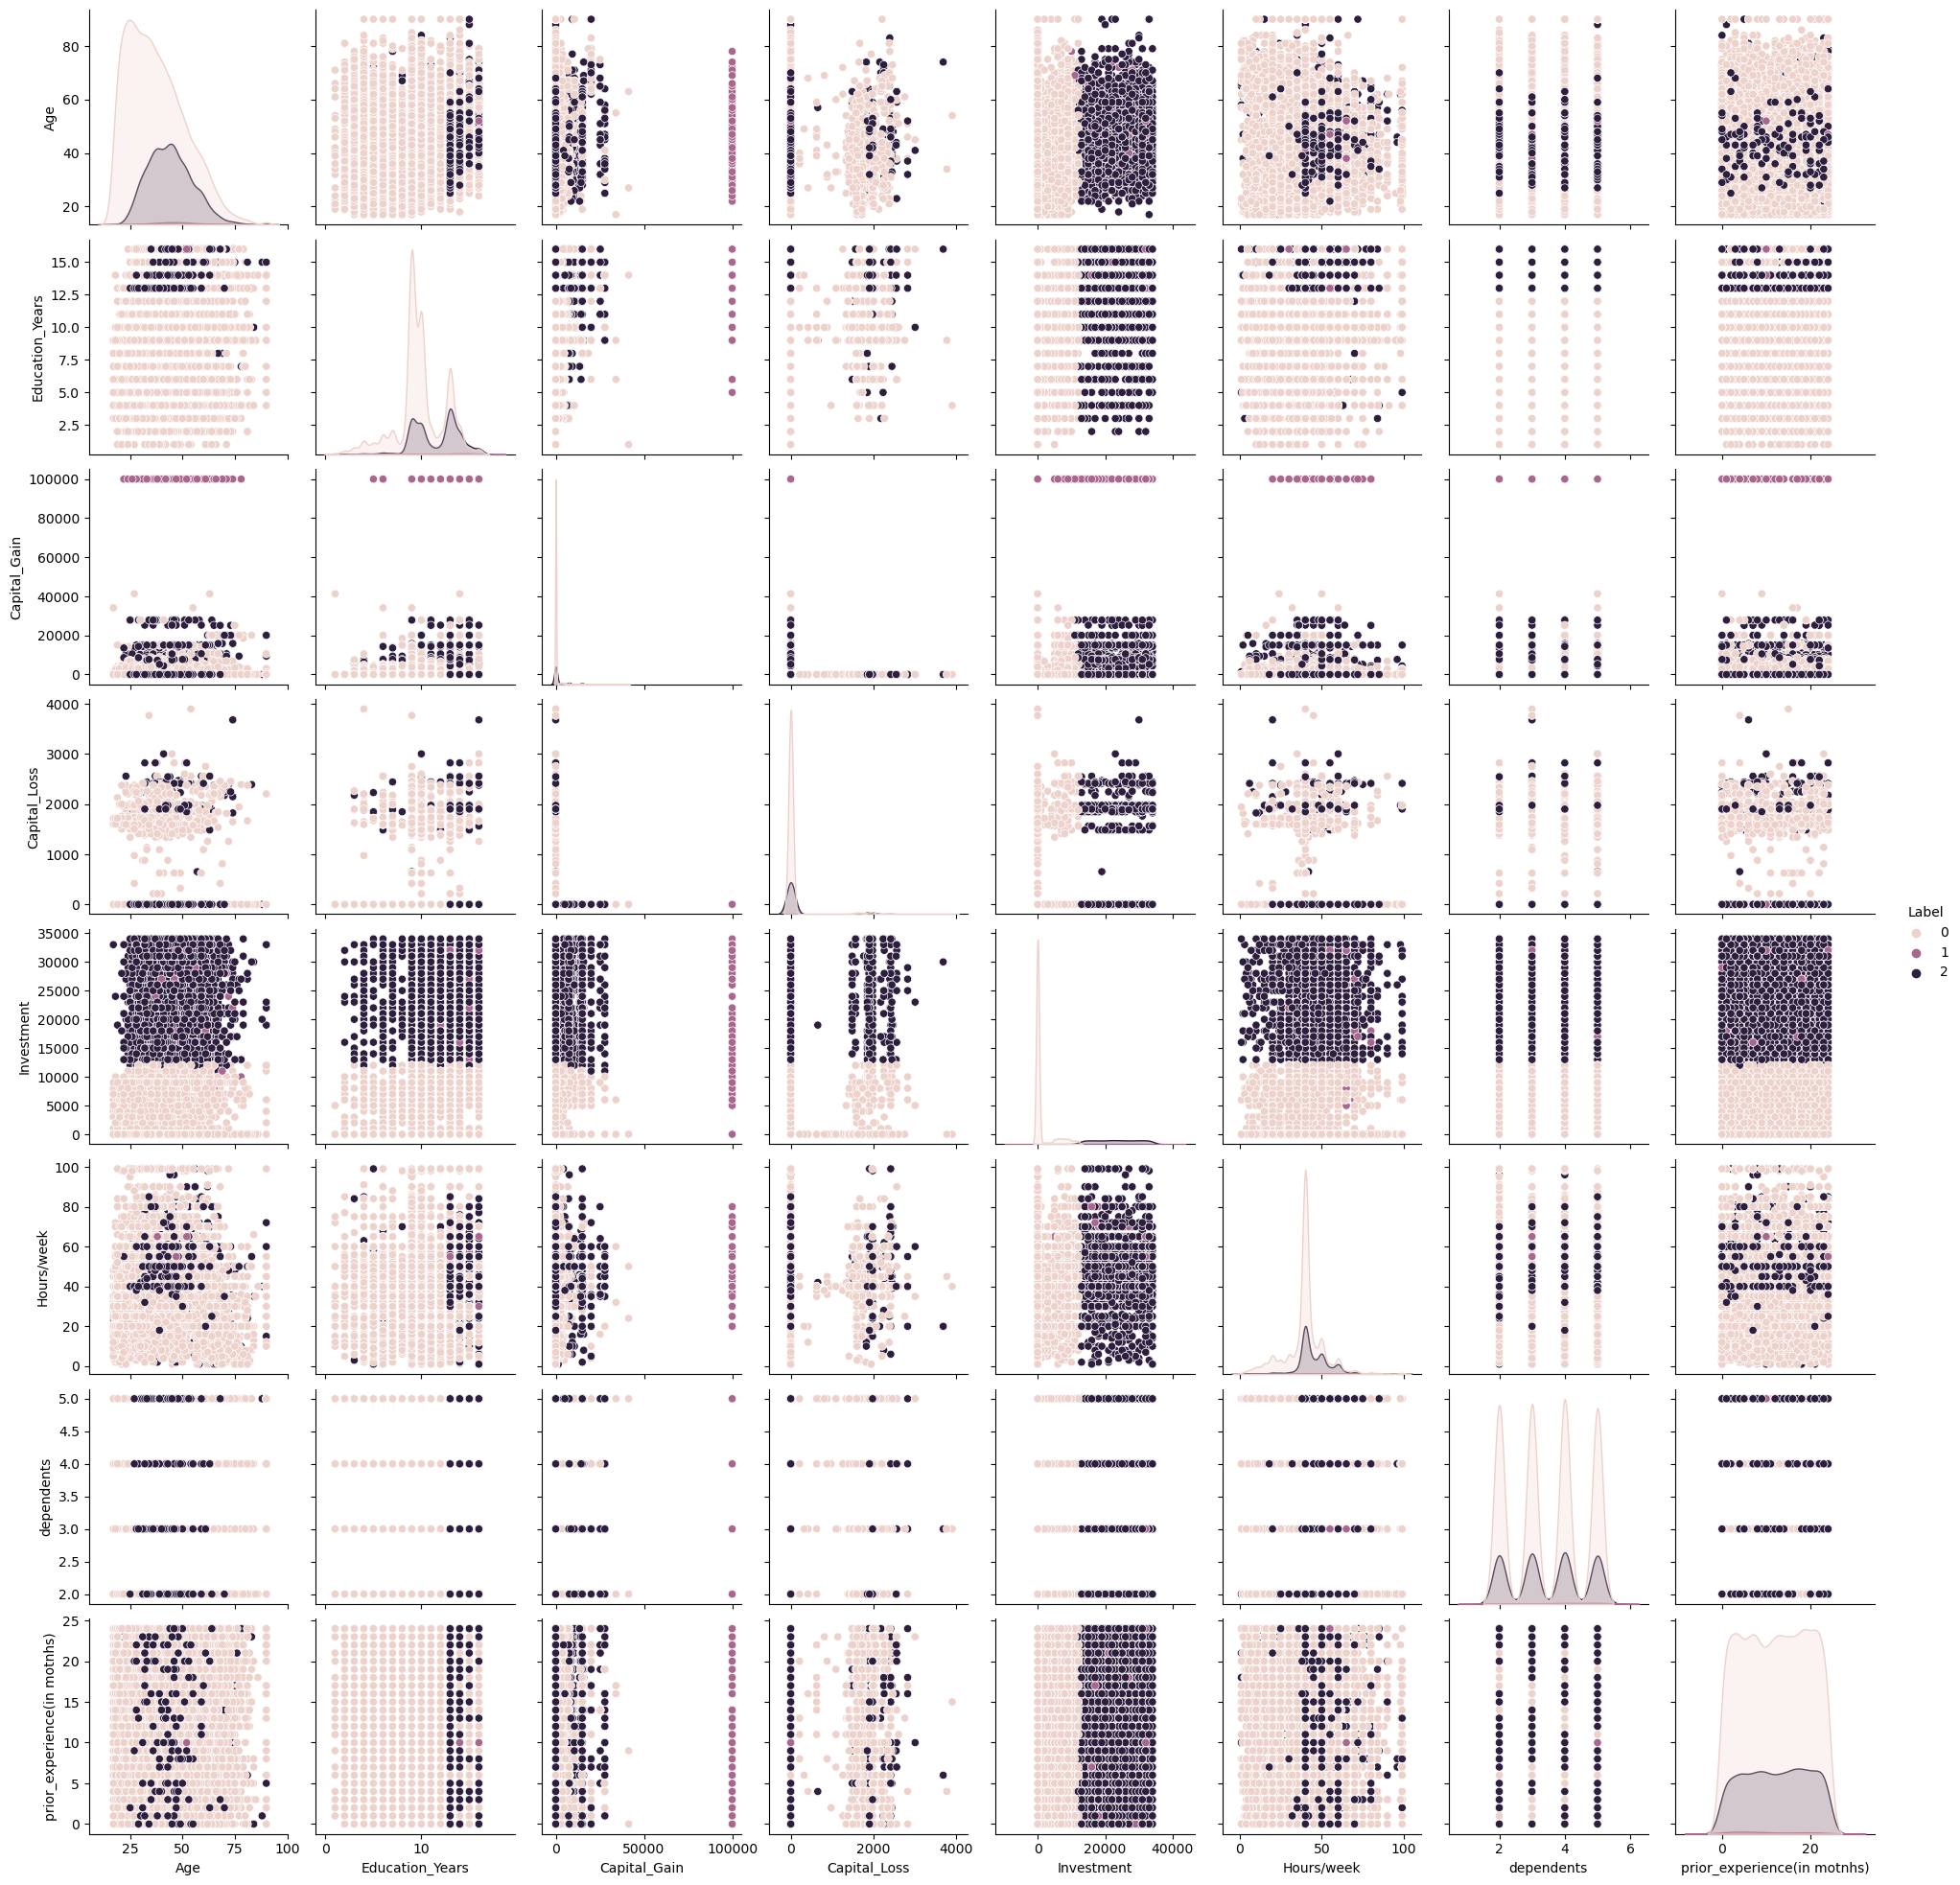

In [111]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X_3,hue='Label');

**In the above Pair Plot, it can be observed that, some of the plots are forming decent clusters. Hence, K Means is a better clustering technique as compared to other techniques for this dataset.**

# Clustering Insights

### Decent Clusters that have good separation are observed in KMeans Clustering technique. Hierarchical Clusteringa and GMM Clustering fail to provide distinct clusters as they are susceptible to complex relationships, outliers and noise, large datasets, etc. 

### KMeans Clustering is best suited for this dataset.

# Business Insights

### 1.) People with higher income (>50K) have more investments than people with lower income, irrespective of age and work experience.

### 2.) People with higher income (>50K) are generally working for more hours/week as compared to lower income groups.

### 3.) People with very high income (>100K) have very high capital gain as compared to other income groups.

### Thank You !